In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.4.1
즉시 실행: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
데이터셋이 복사된 위치: /Users/han/.keras/datasets/iris_training.csv


In [6]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [10]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 5.1, 6.7, 5. , 6.2, 5.3, 6.6, 5. , 6.4, 6.1, 6.4, 4.8, 6. ,
       6.8, 5.1, 5.4, 5.8, 4.4, 6.7, 6. , 7.7, 7.7, 5.5, 5.2, 5.8, 6.4,
       7.9, 5.1, 5.7, 6.8, 7. , 5.6], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 3.8, 3. , 3.4, 2.8, 3.7, 3. , 3.5, 3.1, 3. , 2.7, 3. , 2.2,
       3.2, 2.5, 3.7, 2.7, 3.2, 3. , 2.7, 3. , 2.8, 2.4, 3.4, 2.8, 3.2,
       3.8, 3.8, 4.4, 2.8, 3.2, 2.9], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 1.9, 5. , 1.5, 4.8, 1.5, 4.4, 1.6, 5.5, 4.9, 5.3, 1.4, 5. ,
       5.9, 3. , 1.5, 5.1, 1.3, 5.2, 5.1, 6.1, 6.7, 3.7, 1.4, 5.1, 4.5,
       6.4, 1.5, 1.5, 4.8, 4.7, 3.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.1, 0.4, 1.7, 0.2, 1.8, 0.2, 1.4, 0.6, 1.8, 1.8, 1.9, 0.1, 1.5,
       2.3, 1.1, 0.2, 1.9, 0.2, 2.3, 1.6, 2.3, 2. , 1. , 0.2,

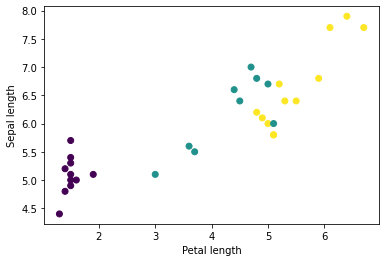

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [12]:
def pack_features_vector(features, labels):
  """특성들을 단일 배열로 묶습니다."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [13]:
train_dataset = train_dataset.map(pack_features_vector)

features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 3.1 1.5 0.1]
 [5.  2.3 3.3 1. ]
 [6.3 2.3 4.4 1.3]
 [7.6 3.  6.6 2.1]
 [4.9 3.  1.4 0.2]], shape=(5, 4), dtype=float32)
